# Importing libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.inspection import permutation_importance

# Loading the dataset

In [6]:
data = pd.read_csv("C:\\Users\\91812\\Downloads\\StudentsPerformance.csv")

# Data Exploration 

In [7]:
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [8]:
label_encoder = LabelEncoder()
categorical_columns = ['gender','race/ethnicity', 'parental level of education','lunch', 'test preparation course']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [9]:
X = data.drop('math score', axis=1)
y = data['math score']

# Training the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

In [ ]:
#first created a Decision Tree Regressor with a random state of 42, then trained it on training data (X_train and y_train).
#After training, made predictions on test data (X_test) and stored the predicted values in y_pred_dt.
#then calculated the Mean Squared Error (dt_mse) and the R-squared score (dt_r2) to evaluate 
#how well the model performed on the test data.


In [ ]:
#created a Linear Regression model and trained it on the training data.
#Similar to the Decision Tree Regressor,made predictions on the test data (X_test) 
#and stored the predicted values in y_pred_lr.
#calculated the Mean Squared Error (lr_mse) and the R-squared score (lr_r2) to assess the 
#performance of the Linear Regression model.


In [ ]:
#created a Random Forest Regressor with a random state of 42, trained it on the training data, and predicted values 
#for the test data (X_test) stored in y_pred_rf.
#hen computed the Mean Squared Error (rf_mse) and the R-squared score (rf_r2) to evaluate how well 
#the Random Forest model performed on the test data.

In [12]:
print(f"decision Tree MSE: {dt_mse}, R2:{dt_r2}")
print(f"Linear Regression MSE: {lr_mse}, R2: {lr_r2}")
print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")      

decision Tree MSE: 60.86, R2:0.7498956186117769
Linear Regression MSE: 28.275284506327342, R2: 0.8838026201112223
Random Forest MSE: 36.79422162429139, R2: 0.8487940184356789


In [ ]:
#By printing these metrics, you can compare the performance of each model based on their MSE
#(how close the predicted values are to the actual values) 
#Lower MSE values and higher R-squared scores generally indicate better model performance.


# Data Visualization

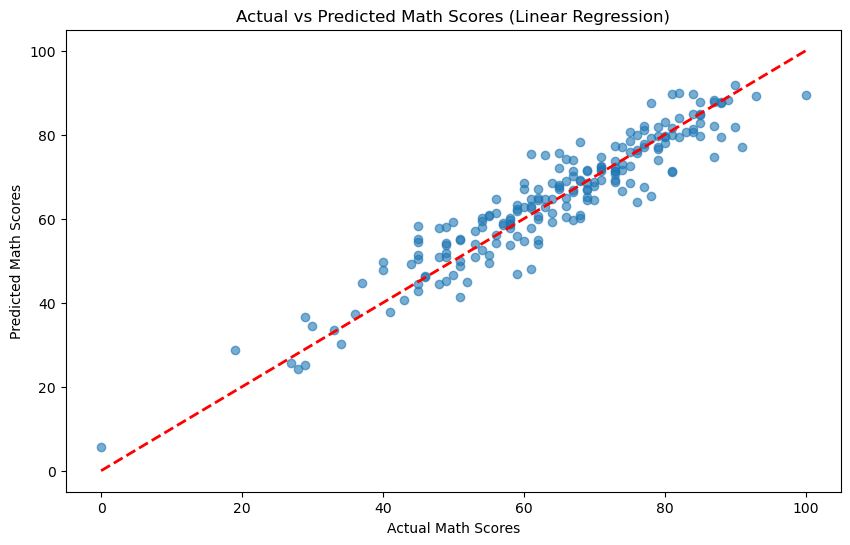

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), 'r--',lw=2)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores (Linear Regression)')
plt.show()


In [14]:
dt_importance = permutation_importance(dt_reg, X_test, y_test, n_repeats=10, random_state=42)
rf_importance = permutation_importance(rf_reg, X_test, y_test, n_repeats=10, random_state=42)
lr_importance_df = pd.DataFrame({'feature': X.columns, 'importance': np.abs(lr_reg.coef_)})

In [15]:
dt_importance_df = pd.DataFrame({'feature': X.columns, 'importance': dt_importance.importances_mean})
rf_importance_df = pd.DataFrame({'feature': X.columns, 'importance': rf_importance.importances_mean})

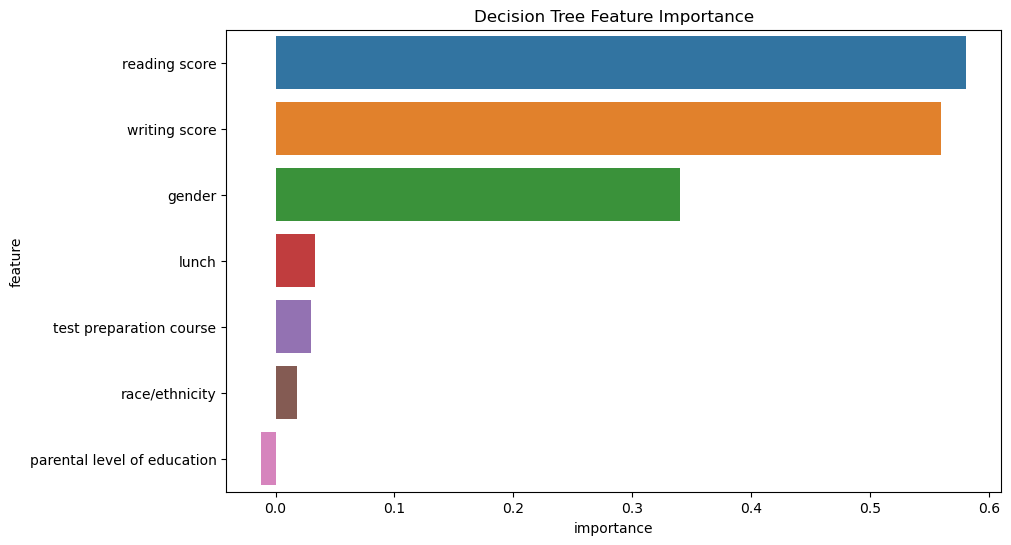

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=dt_importance_df.sort_values(by='importance', ascending=False))
plt.title('Decision Tree Feature Importance')
plt.show()

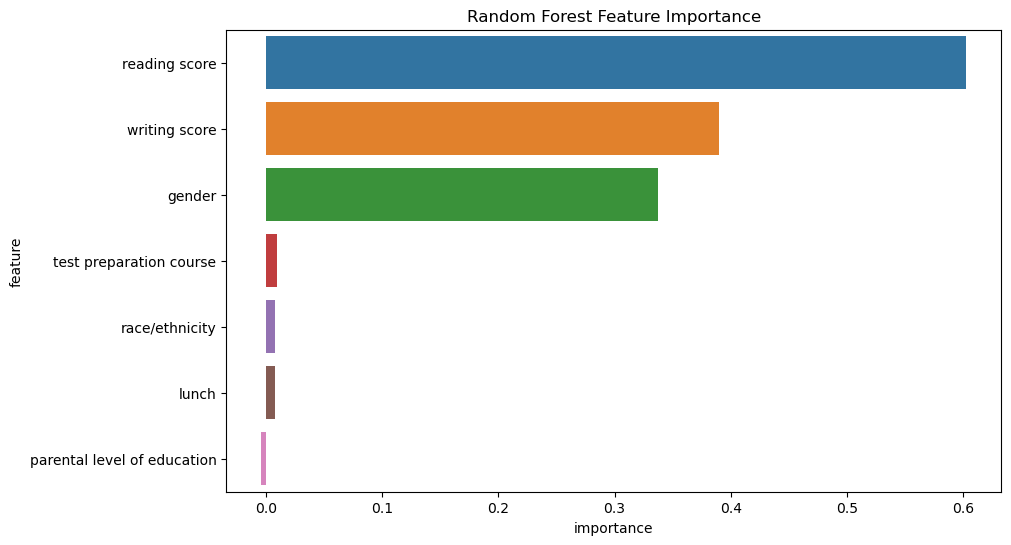

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=rf_importance_df.sort_values(by='importance', ascending=False))
plt.title('Random Forest Feature Importance')
plt.show()

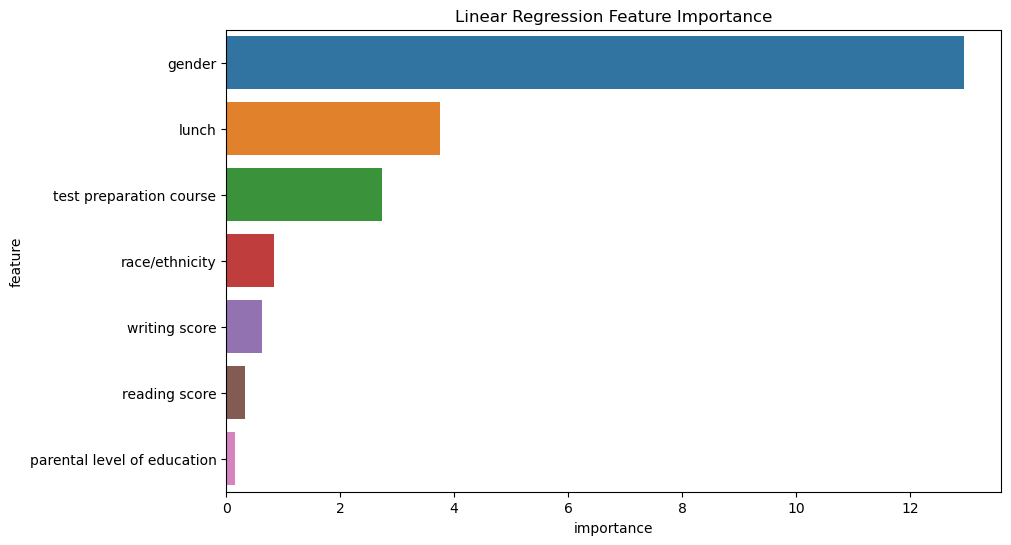

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=lr_importance_df.sort_values(by='importance', ascending=False))
plt.title('Linear Regression Feature Importance')
plt.show()

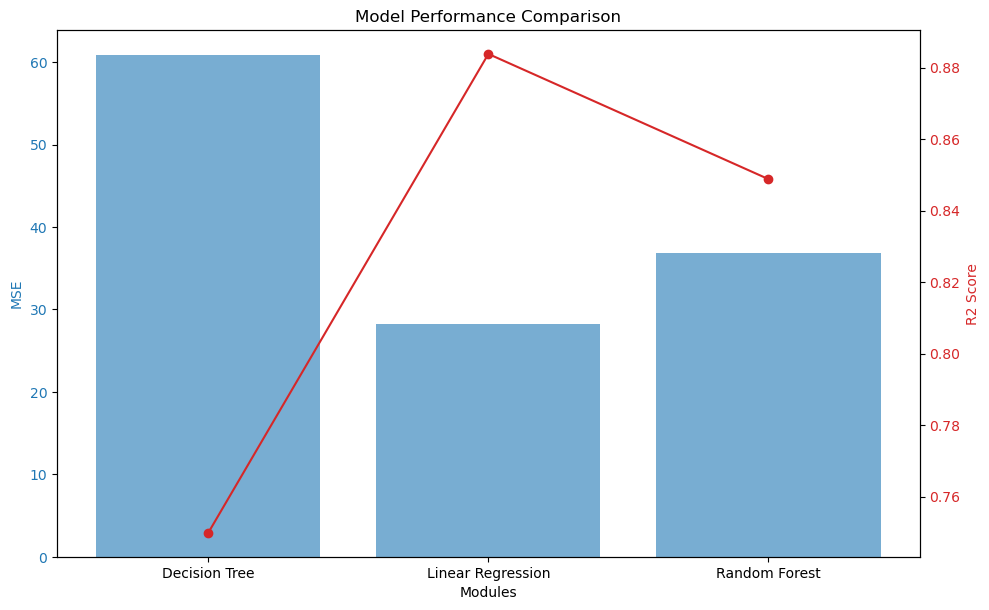

In [19]:
 models = ['Decision Tree','Linear Regression','Random Forest']
 mse_scores = [dt_mse, lr_mse, rf_mse]
 r2_scores = [dt_r2, lr_r2, rf_r2]
    
 fig, ax1 = plt.subplots(figsize=(10, 6))
  
 color = 'tab:blue'
 ax1.set_xlabel('Modules')
 ax1.set_ylabel('MSE', color=color)
 ax1.bar(models, mse_scores, color=color, alpha=0.6)
 ax1.tick_params(axis='y',labelcolor=color)
    
 ax2 = ax1.twinx()
 color = 'tab:red'
 ax2.set_ylabel('R2 Score', color=color)
 ax2.plot(models, r2_scores, color=color, marker='o')
 ax2.tick_params(axis='y', labelcolor=color)

 fig.tight_layout()
 plt.title('Model Performance Comparison')
 plt.show()   